In [1]:
!pip install klib

You should consider upgrading via the 'm:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

import klib


%matplotlib inline

from sklearn import set_config
set_config(print_changed_only=False)

import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv(r"M:\Data Science\Data\Credit Card\credit_train.csv")
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

# Missing Value Plot

GridSpec(6, 6)

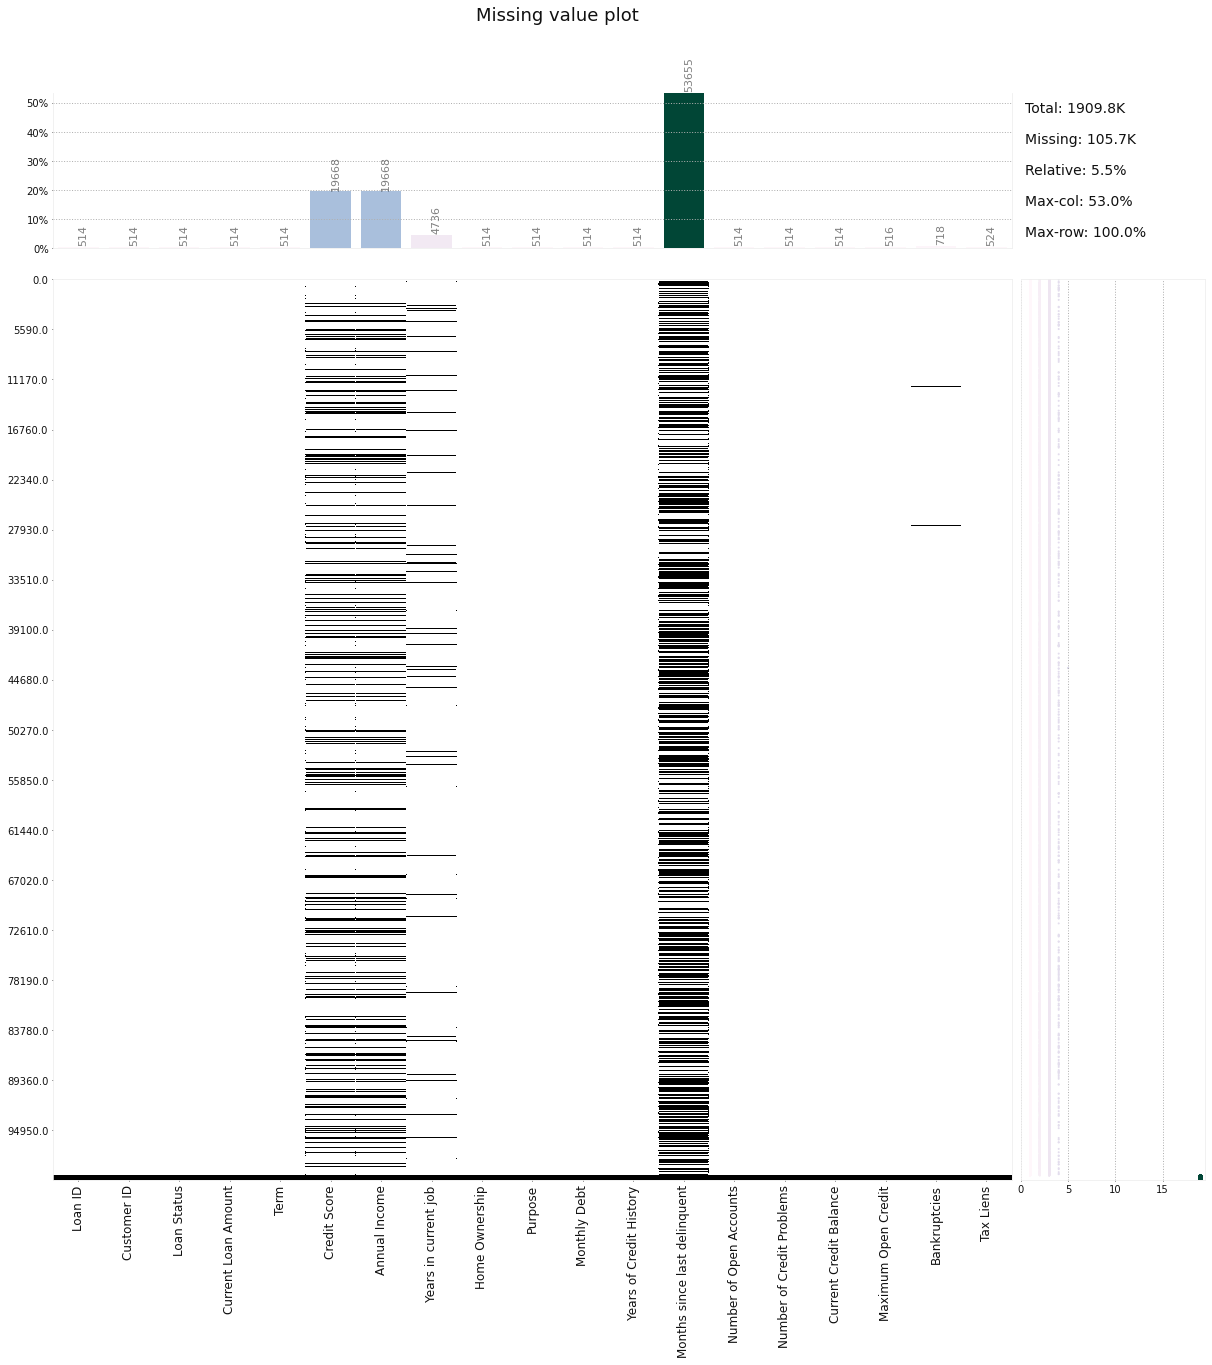

In [33]:
klib.missingval_plot(df)

In [34]:
df.dropna(inplace=True)

In [35]:
le = LabelEncoder()

cat_cols = [i for i in df.columns if df[i].dtype == 'object']

for col_name in cat_cols:
    col_name_encoded = col_name + '_encoded'
    df[col_name_encoded] = le.fit_transform(df[col_name])
    df = df.drop(columns=[col_name])
    
df.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan ID_encoded,Customer ID_encoded,Loan Status_encoded,Term_encoded,Years in current job_encoded,Home Ownership_encoded,Purpose_encoded
2,99999999.0,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,9065,10991,1,1,8,2,3
6,217646.0,730.0,1184194.0,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,4406,16723,1,1,10,1,3
8,548746.0,678.0,2559110.0,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0,16066,20278,1,1,2,3,3
10,99999999.0,728.0,714628.0,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0,5750,1620,1,1,3,3,3
12,99999999.0,740.0,776188.0,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0,7293,2007,1,1,10,2,3


# Data Cleaning

## Drops empty and single valued columns as well as empty and duplicate rows.

In [36]:
df_cleaned= klib.data_cleaning(df)

Long column names detected (>25 characters). Consider renaming thefollowing columns ['months_since_last_delinquent', 'years_in_current_job_encoded'].
Shape of cleaned data: (31254, 19)Remaining NAs: 0

Changes:
Dropped rows: 5169
     of which 5169 duplicates. (Rows: [420, 1627, 2247, 2358, 3265, 3564, 3765, 3933, 4200, 4865, 4925, 5002, 5008, 5441, 5512, 5534, 5836, 5997, 6125, 6383, 6425, 6533, 6698, 6904, 7101, 7103, 7302, 7512, 7605, 7814, 7898, 8129, 8192, 8221, 8336, 8853, 8976, 9039, 9269, 9301, 9319, 9451, 9482, 9623, 9680, 9739, 9779, 9953, 9957, 9987, 10050, 10112, 10234, 10345, 10356, 10412, 10529, 10552, 10560, 10586, 10660, 10693, 10742, 10780, 10999, 11081, 11176, 11271, 11306, 11344, 11387, 11397, 11406, 11523, 11591, 11780, 11939, 12045, 12246, 12291, 12293, 12417, 12424, 12427, 12532, 12654, 12672, 12759, 12829, 12849, 12954, 13068, 13192, 13200, 13212, 13215, 13465, 13477, 13502, 13519, 13539, 13743, 13798, 13876, 14110, 14196, 14283, 14339, 14395, 14514, 14537, 14547

In [37]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31254 entries, 2 to 99997
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   current_loan_amount           31254 non-null  float32
 1   credit_score                  31254 non-null  float32
 2   annual_income                 31254 non-null  float32
 3   monthly_debt                  31254 non-null  float32
 4   years_of_credit_history       31254 non-null  float32
 5   months_since_last_delinquent  31254 non-null  float32
 6   number_of_open_accounts       31254 non-null  float32
 7   number_of_credit_problems     31254 non-null  float32
 8   current_credit_balance        31254 non-null  float32
 9   maximum_open_credit           31254 non-null  float32
 10  bankruptcies                  31254 non-null  float32
 11  tax_liens                     31254 non-null  float32
 12  loan_id_encoded               31254 non-null  int32  
 13  c

# Correlation Plot

### Display only positive correlation

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

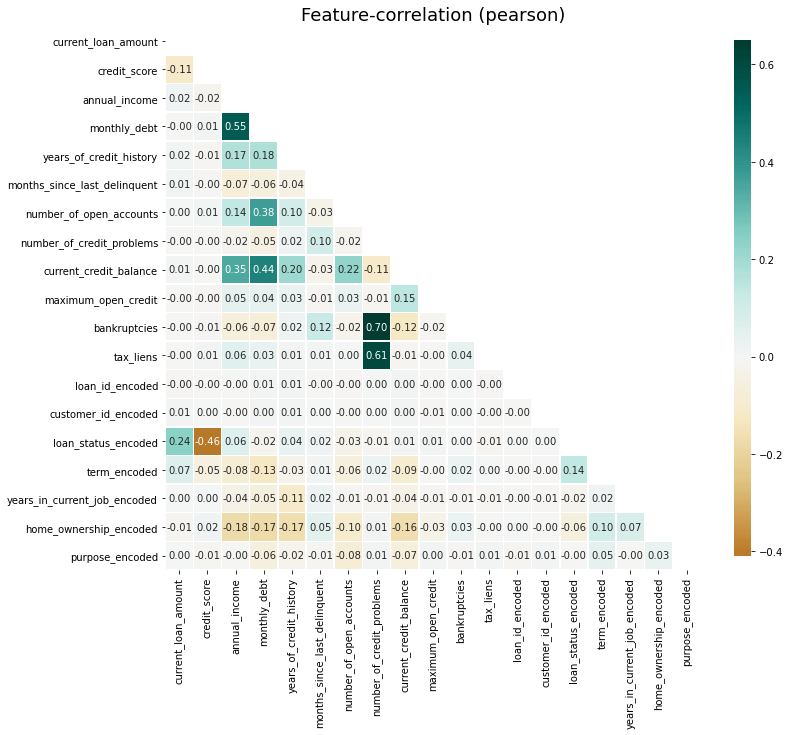

In [38]:
klib.corr_plot(df_cleaned)

### Display only positive correlation

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

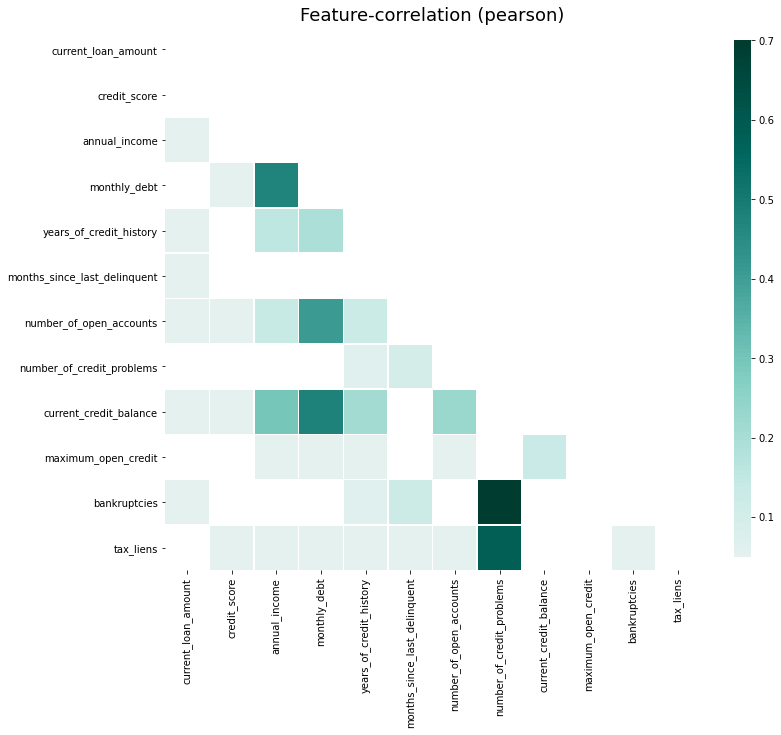

In [9]:
klib.corr_plot(df_cleaned,split='pos',annot=False)

### Display only negative Correlation

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

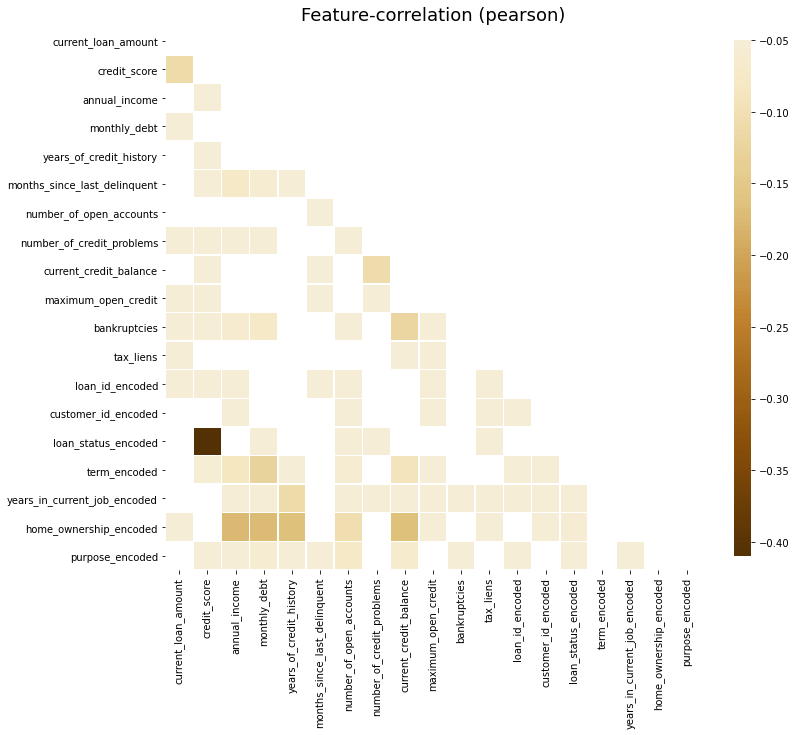

In [40]:
klib.corr_plot(df_cleaned,split='neg',annot=False)

### Display Correlation with a target variable of interest

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

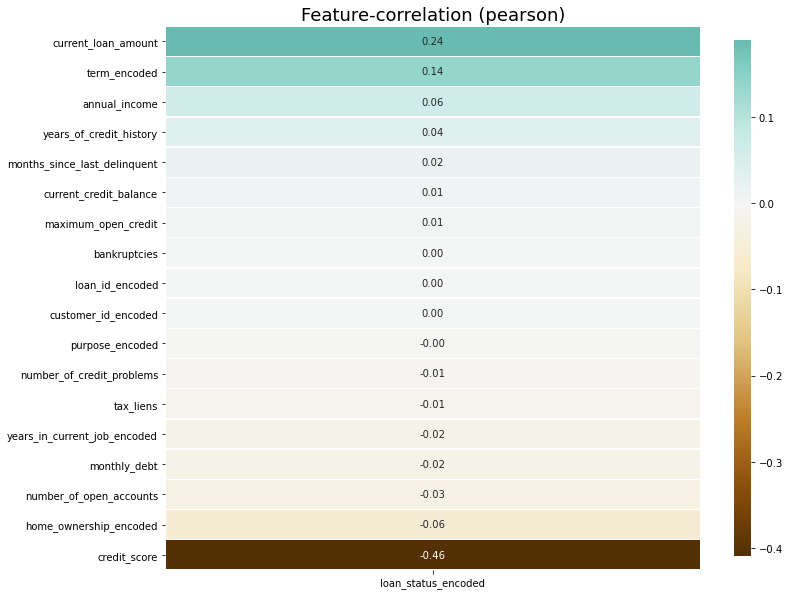

In [41]:
klib.corr_plot(df_cleaned, target='loan_status_encoded')

### Correlation Data Matrix

In [42]:
klib.corr_mat(df_cleaned)

,current_loan_amount,credit_score,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,loan_id_encoded,customer_id_encoded,loan_status_encoded,term_encoded,years_in_current_job_encoded,home_ownership_encoded,purpose_encoded
current_loan_amount,1.00,-0.11,0.02,-0.00,0.02,0.01,0.00,-0.00,0.01,-0.00,-0.00,-0.00,-0.00,0.01,0.24,0.07,0.00,-0.01,0.00
credit_score,-0.11,1.00,-0.02,0.01,-0.01,-0.00,0.01,-0.00,-0.00,-0.00,-0.01,0.01,-0.00,0.00,-0.46,-0.05,0.00,0.02,-0.01
annual_income,0.02,-0.02,1.00,0.55,0.17,-0.07,0.14,-0.02,0.35,0.05,-0.06,0.06,-0.00,-0.00,0.06,-0.08,-0.04,-0.18,-0.00
monthly_debt,-0.00,0.01,0.55,1.00,0.18,-0.06,0.38,-0.05,0.44,0.04,-0.07,0.03,0.01,0.00,-0.02,-0.13,-0.05,-0.17,-0.06
years_of_credit_history,0.02,-0.01,0.17,0.18,1.00,-0.04,0.10,0.02,0.20,0.03,0.02,0.01,0.01,0.01,0.04,-0.03,-0.11,-0.17,-0.02
months_since_last_delinquent,0.01,-0.00,-0.07,-0.06,-0.04,1.00,-0.03,0.10,-0.03,-0.01,0.12,0.01,-0.00,0.00,0.02,0.01,0.02,0.05,-0.01
number_of_open_accounts,0.00,0.01,0.14,0.38,0.10,-0.03,1.00,-0.02,0.22,0.03,-0.02,0.00,-0.00,-0.00,-0.03,-0.06,-0.01,-0.10,-0.08
number_of_credit_problems,-0.00,-0.00,-0.02,-0.05,0.02,0.10,-0.02,1.00,-0.11,-0.01,0.70,0.61,0.00,0.00,-0.01,0.02,-0.01,0.01,0.01
current_credit_balance,0.01,-0.00,0.35,0.44,0.20,-0.03,0.22,-0.11,1.00,0.15,-0.12,-0.01,0.00,0.00,0.01,-0.09,-0.04,-0.16,-0.07
maximum_open_credit,-0.00,-0.00,0.05,0.04,0.03,-0.01,0.03,-0.01,0.15,1.00,-0.02,-0.00,-0.00,-0.01,0.01,-0.00,-0.01,-0.03,0.00


## Distribution Plot

#### (Better to be applied to Regression Case)

In [43]:
klib.dist_plot(df_cleaned['loan_status_encoded'])

No columns with numeric data were detected.


### Display correlation with a target variable of interest



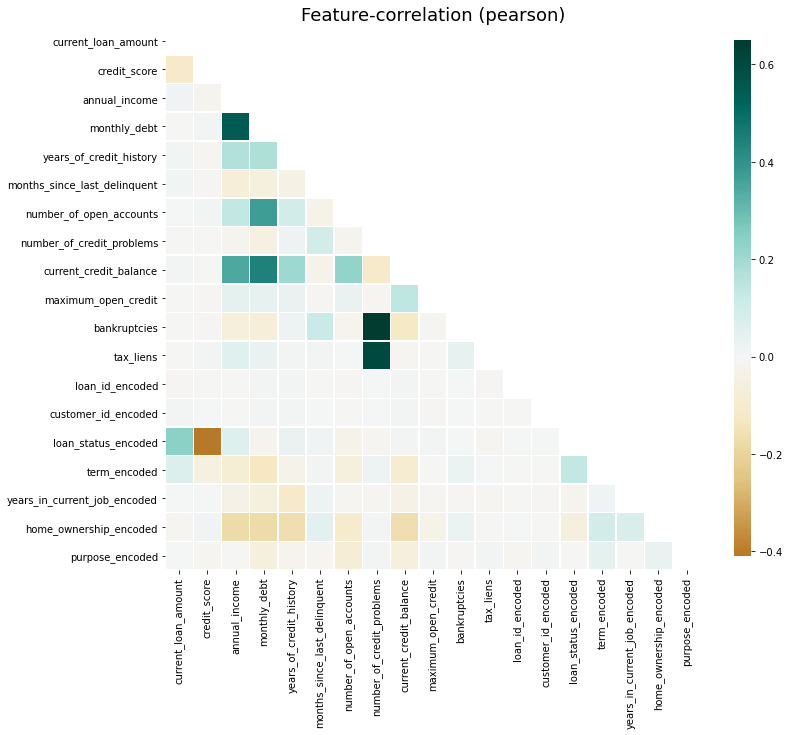

In [44]:
plot = klib.corr_plot(df_cleaned, annot=False, figsize=(12,10))